# Dependencies

In [1]:
import numpy as np

import warnings

import torch
import geoopt

from utils import data, model

/home/pdomonkos/anaconda3/envs/torch_geometric/lib/python3.12/site-packages/torch_geometric/typing.py:54: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/pdomonkos/anaconda3/envs/torch_geometric/lib/python3.12/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/pdomonkos/anaconda3/envs/torch_geometric/lib/python3.12/site-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/pdomonkos/anaconda3/envs/torch_geometric/lib/python3.12/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


Fixing the random seed for reproducibility.

In [2]:
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

Set double precision for the numerical stability of the Lorentz manifold.

In [3]:
torch.set_default_dtype(torch.float64)

Ignore warnings.

In [4]:
warnings.filterwarnings('ignore')

# Representation learning and evaluation

In [5]:
data_path = "./data"
result_path = "./results"

config = {
    "manifold": geoopt.manifolds.Lorentz(k = 1.0, learnable = False),
    #"manifold": geoopt.manifolds.PoincareBallExact(c = 1.0, learnable = False),
    #"manifold": None,
    "embedding_dim": 128,

    "p": 1,
    "q": 4,                   
    "walks_per_node": 1,
    "walk_length": 10,
    "context_size": 10,
    "num_negative_samples": 1,
 
    "num_epochs": 100,
    "test_epochs": 5,
    "batch_size": 64,          
    "learning_rate": 0.025,      
    "lambda": 0.2,              
  
    "device": torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0"),
    "num_workers": 16 if not torch.cuda.is_available() else 0
}

In [6]:
tissue_hierarchy, ppi_networks, labels = data.read_data(data_path)

Read data:
	Tissue hierarchy with 219 nodes.
	144 tissue-specific PPI networks, with an average of 1906.99 nodes and 25462.24 edges.
	503 tissue-specific cellular functions (with 420 unique functions) covering 48 distinct tissues.


Training OhmNet:   0%|          | 0/100 [00:00<?, ?it/s]

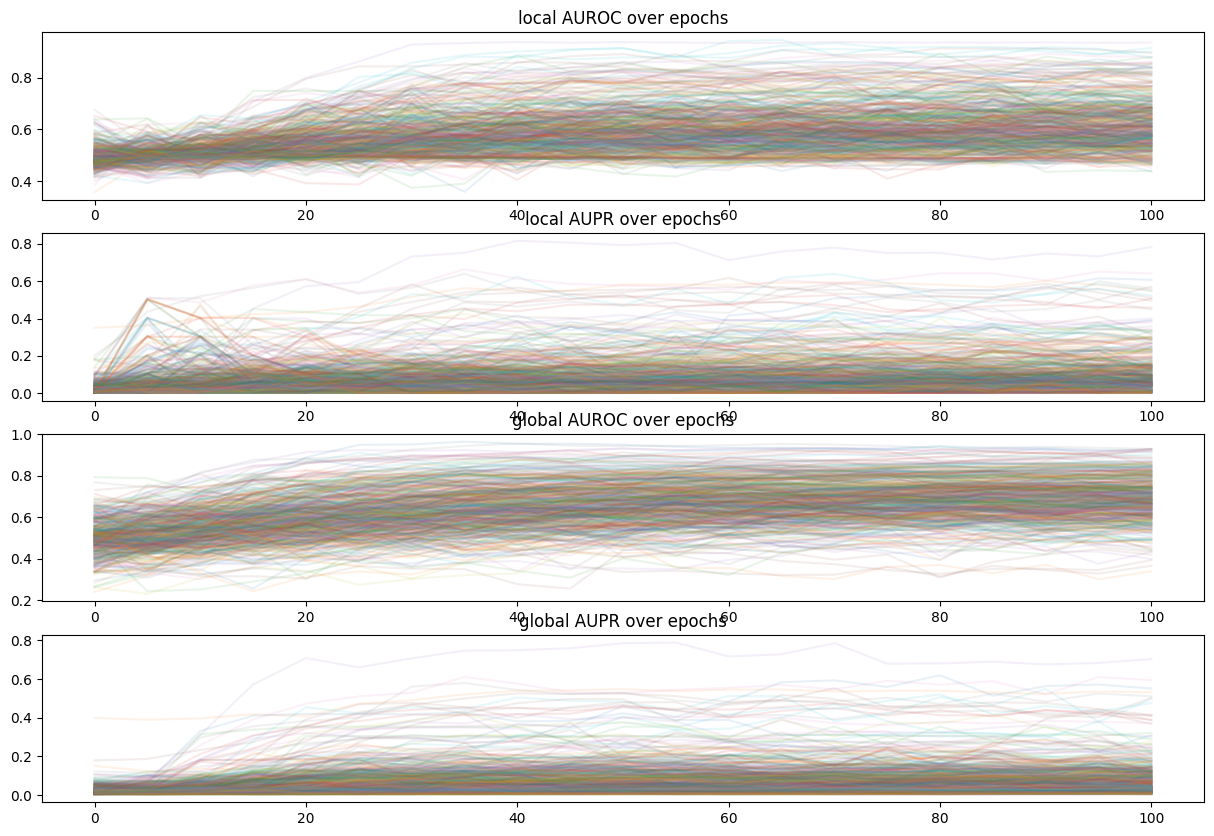

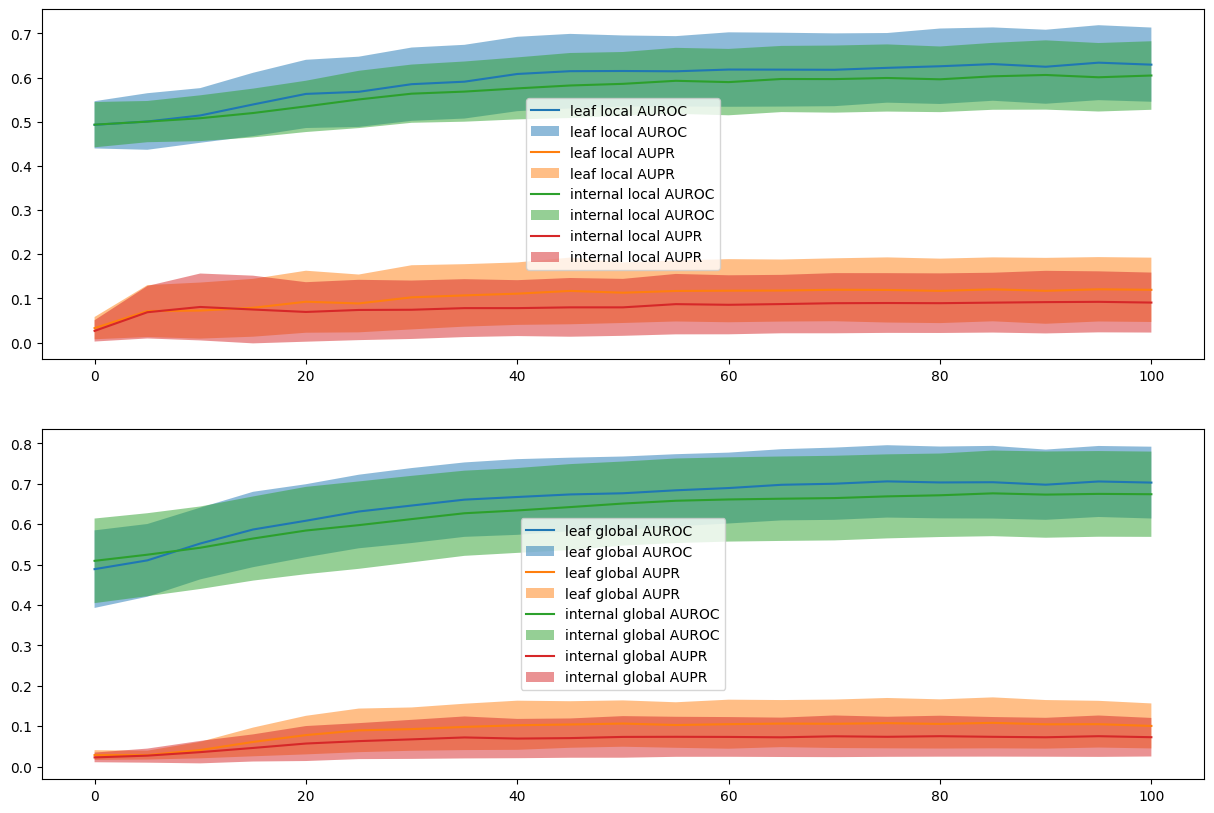

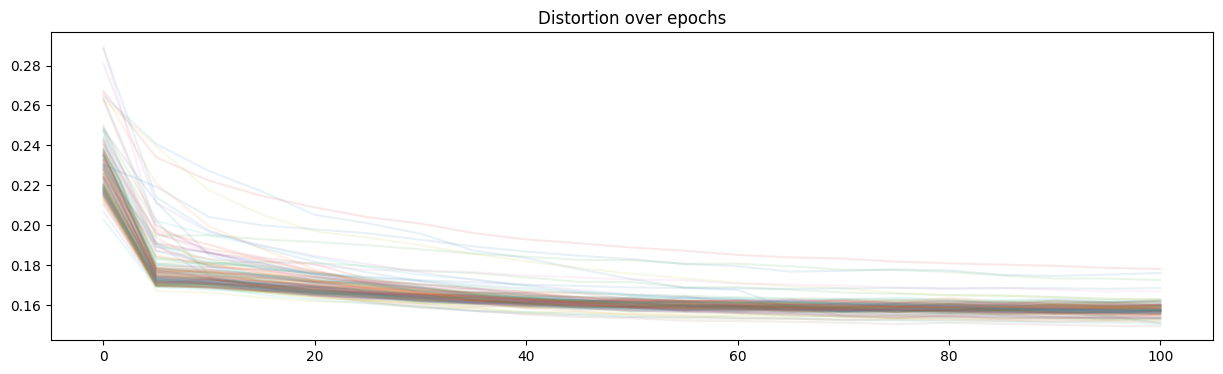

0.15833302872718216
0.15804666707632792


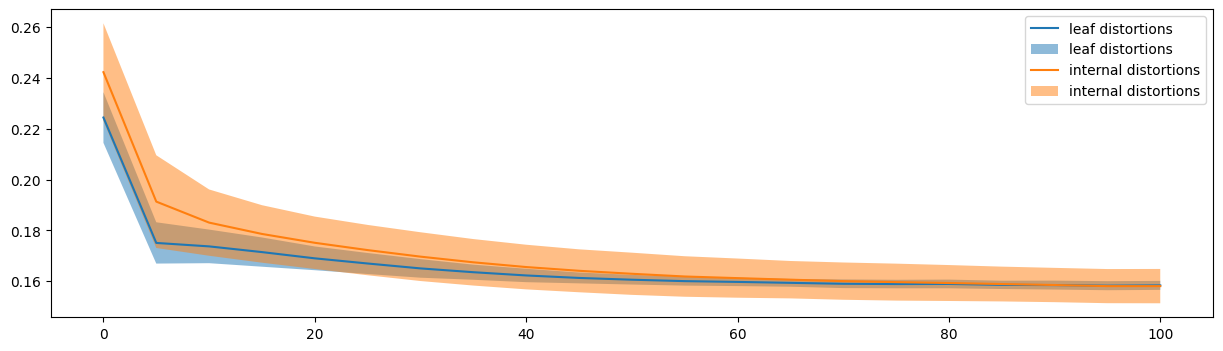

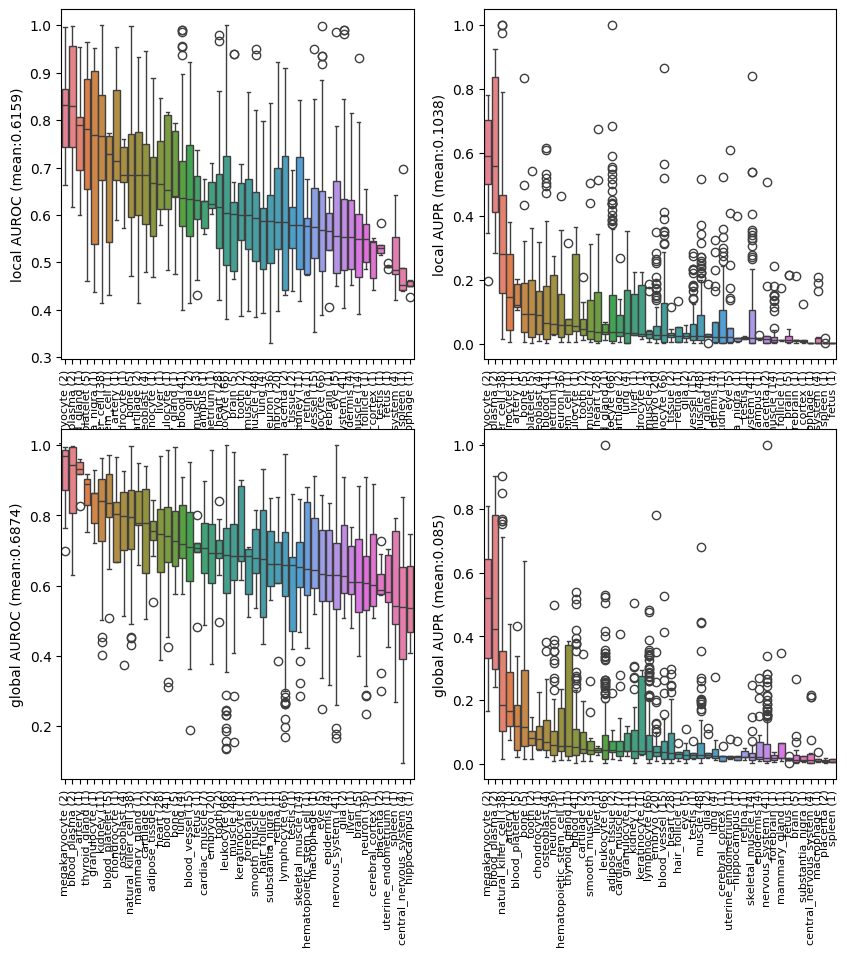

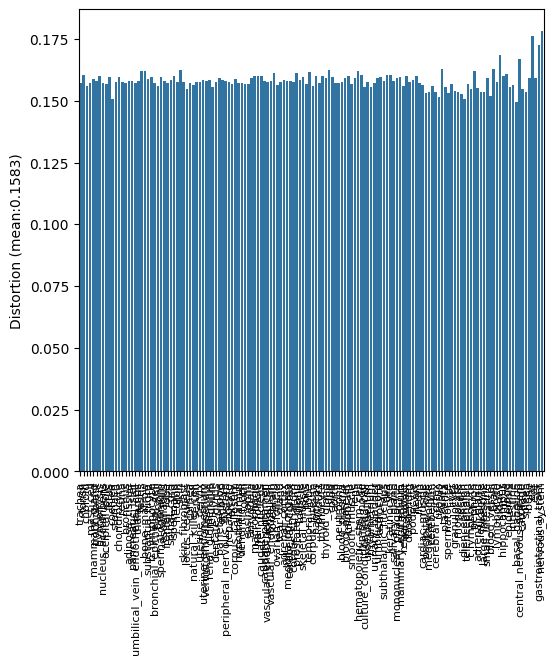

In [7]:
OhmNet = model.TissueSpecificProteinEmbeddings(tissue_hierarchy, ppi_networks, labels, config)
OhmNet.train()
#OhmNet.load(result_path)
OhmNet.save(result_path)
OhmNet.show_results_over_epochs()
OhmNet.show_classification_results()
OhmNet.show_distortion_results()